LOADING AND PREPROCESSING OF DATASETS

In [ ]:
#loading the datsets
import pandas as pd
df=pd.read_csv('/content/car data.csv')


In [ ]:
#displaying the first five and last five elements in an datasets
print(df.head())
print(df.tail())
print(df.columns)

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
296     city  2016           9.50           11.6       33988    Diesel   
297     brio  2015           4.00            5.9       60000    Petrol   
298     city  2009           3.35           11.0       87934    Petrol   
299     city  2017          11.50           12.5 

CLEANING OF THE DATASETS


In [ ]:
#cleaning of datasets
df.isnull().sum()


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
#to drop all the duplicates rows in it
df.drop_duplicates(inplace=True)


In [ ]:
#it checks the missing values in the datasets
df.isna()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [ ]:
#to drop all the rows or columns which contains missing values
#df.dropna(inplace=True)
print(df.columns)

VISUALLISATION OF DATASET


                   Year  Selling_Price  Present_Price  Driven_kms     Owner
Year           1.000000       0.236141      -0.047192   -0.524342 -0.182104
Selling_Price  0.236141       1.000000       0.878914    0.029187 -0.088344
Present_Price -0.047192       0.878914       1.000000    0.203618  0.008058
Driven_kms    -0.524342       0.029187       0.203618    1.000000  0.089216
Owner         -0.182104      -0.088344       0.008058    0.089216  1.000000


<Axes: >

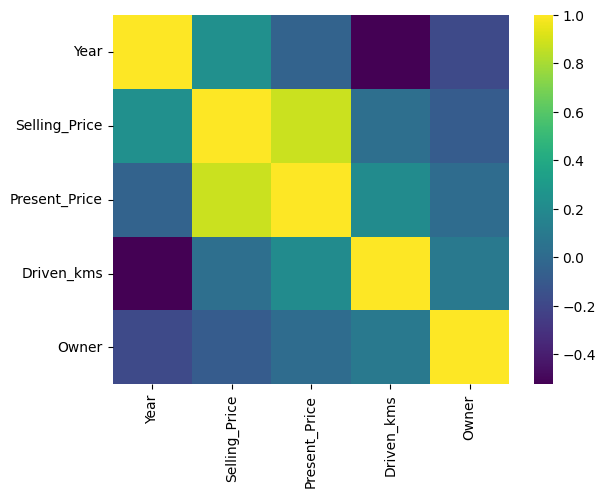

In [ ]:

#plotting the heatmap
import matplotlib.pyplot as plt
import seaborn as sns
car_data=df.drop(['Car_Name','Fuel_Type','Selling_type','Transmission'],axis=1)
correlation_matrix=car_data.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix,xticklabels=car_data.columns,yticklabels=car_data.columns,cmap='viridis')


<Axes: xlabel='Selling_Price', ylabel='count'>

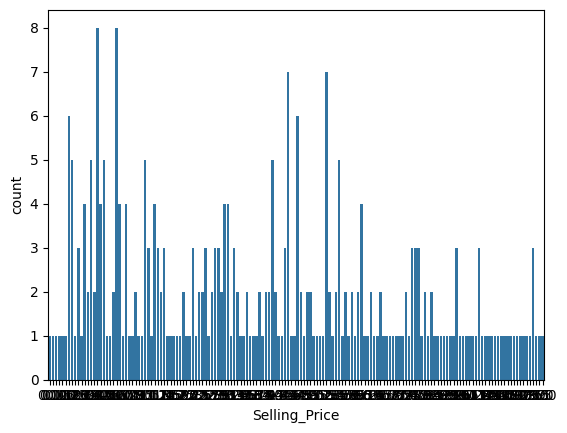

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Selling_Price',data=car_data)

<Axes: xlabel='Selling_Price', ylabel='count'>

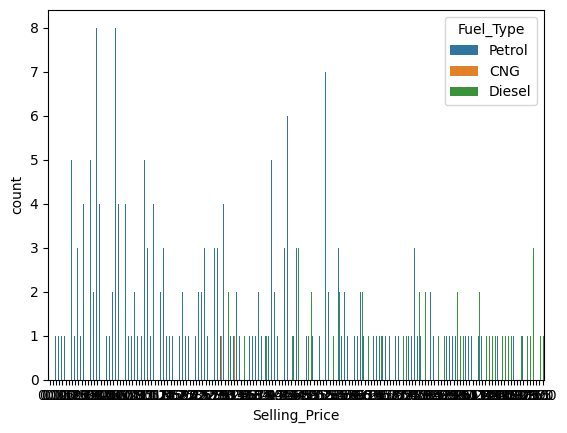

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Selling_Price',hue='Fuel_Type',data=df)

<Axes: >

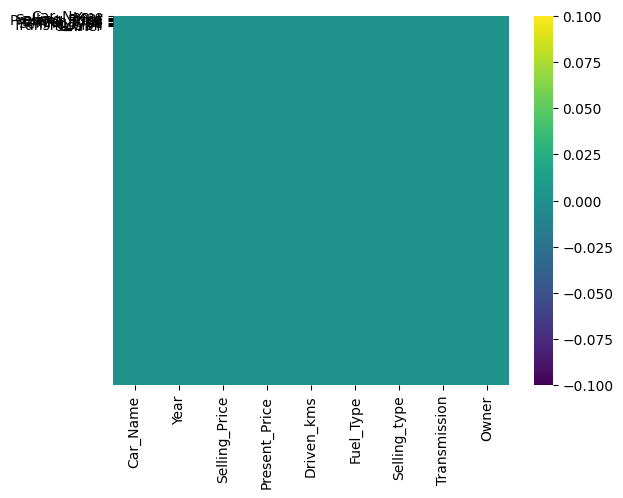

In [ ]:
#plotting the missing values in heatmap
#and it also represents there presents no missing values in every rows and column
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull(),xticklabels=df.columns,yticklabels=df.columns,cmap='viridis')

<Axes: >

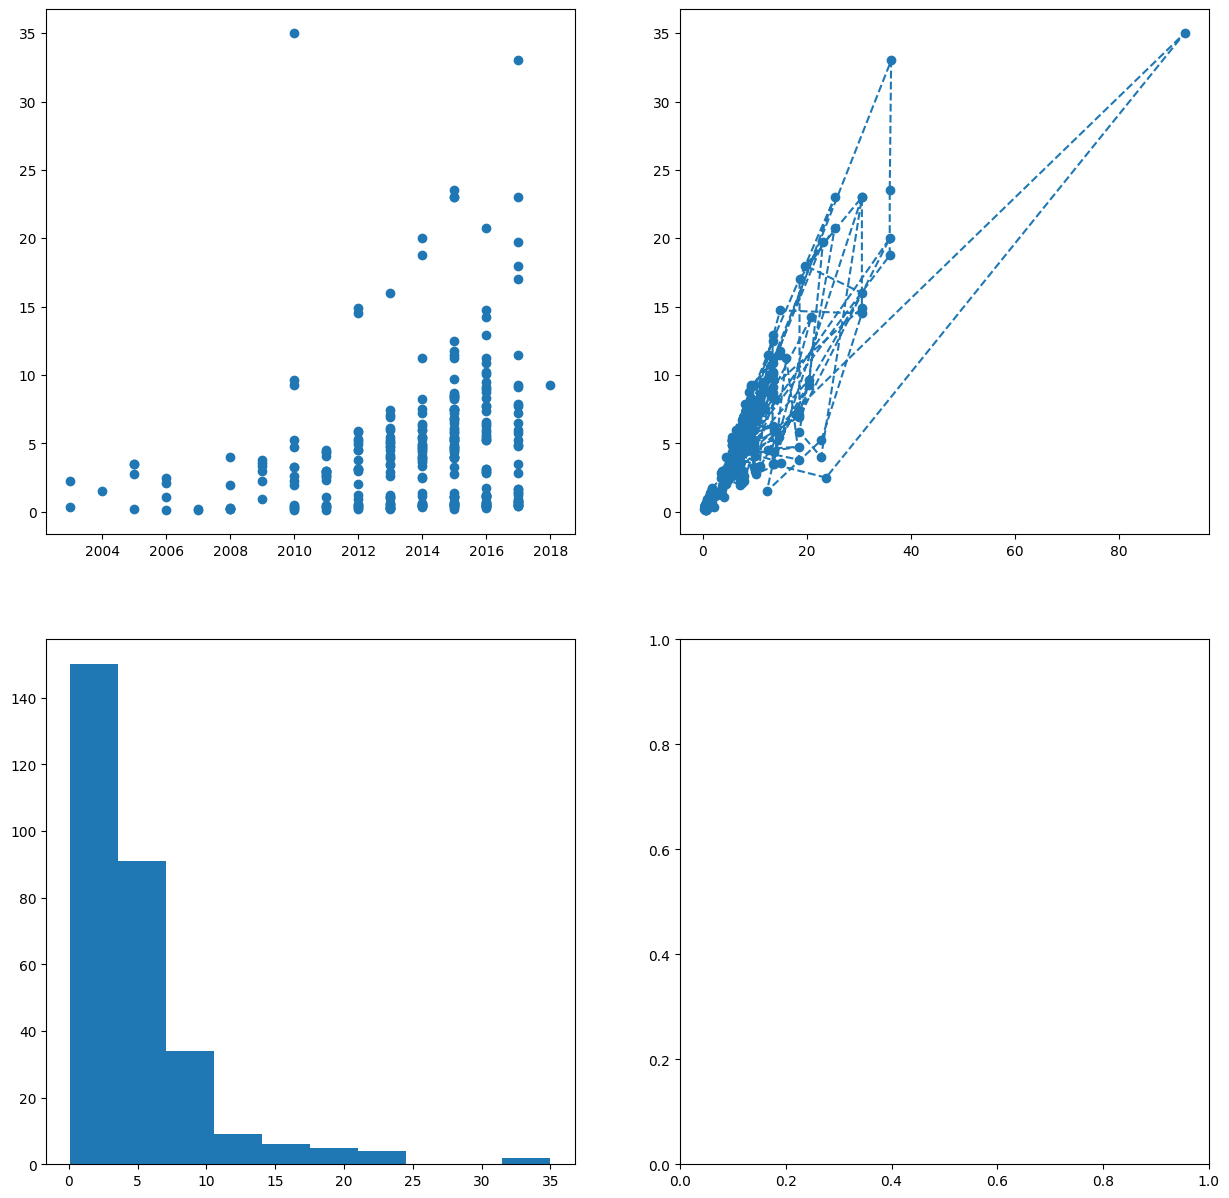

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.scatter(df['Year'],df['Selling_Price'])
plt.subplot(2,2,2)
plt.plot(df['Present_Price'],df['Selling_Price'],marker='o',linestyle='--')
plt.subplot(2,2,3)
plt.hist(df['Selling_Price'],bins=10)
plt.subplot(2,2,4)




<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

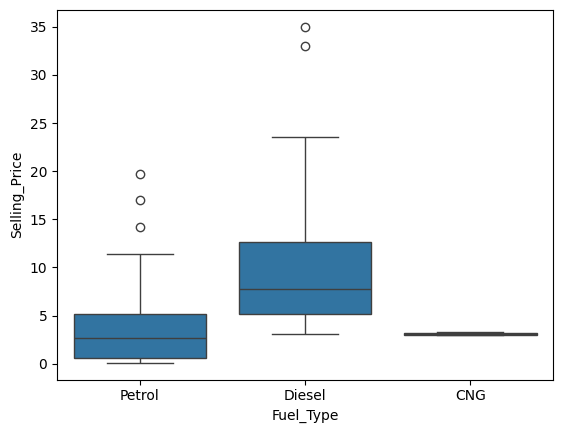

In [ ]:
#creating the boxplot for the following
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Fuel_Type',y='Selling_Price',data=df)

MODEL TRAINING AND PREDICTION

In [ ]:
import pandas as pd
x=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']
x=pd.get_dummies(x).squeeze()
print(x.shape)
print(y.shape)


(301, 109)
(301,)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(y_train.shape)



(240,)


In [ ]:
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred=classifier.predict(x_test)
rmse=mean_squared_error(y_test,y_pred)
print("the root mean squared error will be",rmse)
r2=r2_score(y_test,y_pred)
print("the r2 score will be",r2)

the root mean squared error will be 2.2878245327200823
the r2 score will be 0.9006830267013665
